# Google Stock Analysis using R

### Introduction

We are using R to perform analysis of Google stock datasets. We are interested in finding any trends and insights that may provide us any valuable information about stocks and shareholders as well. However before we visualize the data we need to look at the dataset and perform any data cleaning or calculation as needed. But first we are loading all the necessary pacakeges and using read function from tidyverse packages to read the dataset.  

In [1]:
library(tidyverse)
library(lubridate)
library(skimr)
library(TTR)
library(zoo)
library(scales)
library(plotly)

## Read the dataset

google_df <- read.csv("/kaggle/input/2020-2025-google-stock-dataset/google_5yr_one.csv")
head(google_df)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object i

,Date,Close,High,Low,Open,Volume
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
2,2020-06-04,70.3785171508789,71.72309429138843,69.96599205492319,71.4971694316438,26982000
3,2020-06-05,71.65840148925781,71.9709103787135,70.0461071028752,70.44520002096422,42642000
4,2020-06-08,72.05748748779297,72.10525562528537,70.88509140875318,70.974667107052,33878000
5,2020-06-09,72.25852966308594,73.04079279119881,71.77484210279437,71.91816171630913,33624000
6,2020-06-10,72.88652801513672,73.28810385800969,72.37198974644225,72.72778683921254,31762000


In [2]:
## Viewing the structure and format of the columns in the dataset 
glimpse(google_df)
skim(google_df)


Rows: 1,256
Columns: 6
$ Date   <chr> "", "2020-06-04", "2020-06-05", "2020-06-08", "2020-06-09", "20…
$ Close  <chr> "GOOGL", "70.3785171508789", "71.65840148925781", "72.057487487…
$ High   <chr> "GOOGL", "71.72309429138843", "71.9709103787135", "72.105255625…
$ Low    <chr> "GOOGL", "69.96599205492319", "70.0461071028752", "70.885091408…
$ Open   <chr> "GOOGL", "71.4971694316438", "70.44520002096422", "70.974667107…
$ Volume <chr> "GOOGL", "26982000", "42642000", "33878000", "33624000", "31762…
── Data Summary ────────────────────────
                           Values   
Name                       google_df
Number of rows             1256     
Number of columns          6        
_______________________             
Column type frequency:              
  character                6        
________________________            
Group variables            None     

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate m

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 9' in coercion to 'logical(1)'


# Data Cleaning

Using the glimpsem, head, tail function it is obvious that there are six columns. 


* Date: The trading day in YYYY-MM-DD format
* Open: Price at market openHigh: Highest price during the trading session
* Low: Lowest price during the trading session
* Close: Price at market closeAdj Close: Adjusted closing price accounting for dividends and stock splits
* Volume: Number of shares traded


All the column has character datatype. So our first job is to change the datatypes into correct format. 


In [3]:
## Change datatypes  

google_df <- google_df[-1, ] ## removing first row
google_df$Date <- as.Date(google_df$Date) ## using as.Date
google_df$Volume <- as.integer(google_df$Volume) ## using as.integer
cols_to_convert <- c("Close", "High", "Low", "Open") ## using list as all the datatypes will be same and changing each of them will be repetitive
google_df[cols_to_convert] <- lapply(google_df[cols_to_convert], as.numeric) ## using as.numeric
str(google_df)
head(google_df)
tail(google_df)

'data.frame':	1255 obs. of  6 variables:
 $ Date  : Date, format: "2020-06-04" "2020-06-05" ...
 $ Close : num  70.4 71.7 72.1 72.3 72.9 ...
 $ High  : num  71.7 72 72.1 73 73.3 ...
 $ Low   : num  70 70 70.9 71.8 72.4 ...
 $ Open  : num  71.5 70.4 71 71.9 72.7 ...
 $ Volume: int  26982000 42642000 33878000 33624000 31762000 47144000 36676000 30468000 30648000 30610000 ...


,Date,Close,High,Low,Open,Volume
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2,2020-06-04,70.37852,71.72309,69.96599,71.49717,26982000
3,2020-06-05,71.65840,71.97091,70.04611,70.44520,42642000
4,2020-06-08,72.05749,72.10526,70.88509,70.97467,33878000
5,2020-06-09,72.25853,73.04079,71.77484,71.91816,33624000
6,2020-06-10,72.88653,73.28810,72.37199,72.72779,31762000
7,2020-06-11,69.76147,72.23465,69.58781,71.70866,47144000


,Date,Close,High,Low,Open,Volume
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1251,2025-05-23,168.47,169.96,167.89,169.06,35211400
1252,2025-05-27,172.90,173.17,170.00,170.16,37995700
1253,2025-05-28,172.36,175.27,171.91,173.16,34784000
1254,2025-05-29,171.86,174.42,170.63,174.00,29373800
1255,2025-05-30,171.74,172.21,167.44,171.35,52639900
1256,2025-06-02,169.03,169.87,167.39,167.84,38532600


# Calculations

In [4]:
## Calculate simple daily returns and logarithmic daily returns 

google_df <- google_df %>%
    arrange(Date)
google_df <- google_df %>%
    mutate(
        daily_return_simple =(Close / lag(Close)) - 1,
        daily_return_log =log(Close/ lag(Close))
        )
head(google_df)
tail(google_df)

,Date,Close,High,Low,Open,Volume,daily_return_simple,daily_return_log
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,2020-06-04,70.37852,71.72309,69.96599,71.49717,26982000,NA,NA
2,2020-06-05,71.65840,71.97091,70.04611,70.44520,42642000,0.018185725,0.018022342
3,2020-06-08,72.05749,72.10526,70.88509,70.97467,33878000,0.005569284,0.005553833
4,2020-06-09,72.25853,73.04079,71.77484,71.91816,33624000,0.002790025,0.002786140
5,2020-06-10,72.88653,73.28810,72.37199,72.72779,31762000,0.008690993,0.008653443
6,2020-06-11,69.76147,72.23465,69.58781,71.70866,47144000,-0.042875597,-0.043821903


,Date,Close,High,Low,Open,Volume,daily_return_simple,daily_return_log
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1250,2025-05-23,168.47,169.96,167.89,169.06,35211400,-0.0140457305,-0.0141453052
1251,2025-05-27,172.90,173.17,170.00,170.16,37995700,0.0262954392,0.0259556577
1252,2025-05-28,172.36,175.27,171.91,173.16,34784000,-0.0031231539,-0.0031280411
1253,2025-05-29,171.86,174.42,170.63,174.00,29373800,-0.0029009051,-0.0029051209
1254,2025-05-30,171.74,172.21,167.44,171.35,52639900,-0.0006982143,-0.0006984582
1255,2025-06-02,169.03,169.87,167.39,167.84,38532600,-0.0157797055,-0.0159055305


In [5]:
## Calculate volatility

google_df <- google_df %>%
    mutate(
    volatlity_50d = runSD(daily_return_log, n=50),
    volatility_200d = runSD(daily_return_log, n=200)
    )
head(google_df)
tail(google_df)
str(google_df)
skim(google_df)

,Date,Close,High,Low,Open,Volume,daily_return_simple,daily_return_log,volatlity_50d,volatility_200d
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-06-04,70.37852,71.72309,69.96599,71.49717,26982000,NA,NA,NA,NA
2,2020-06-05,71.65840,71.97091,70.04611,70.44520,42642000,0.018185725,0.018022342,NA,NA
3,2020-06-08,72.05749,72.10526,70.88509,70.97467,33878000,0.005569284,0.005553833,NA,NA
4,2020-06-09,72.25853,73.04079,71.77484,71.91816,33624000,0.002790025,0.002786140,NA,NA
5,2020-06-10,72.88653,73.28810,72.37199,72.72779,31762000,0.008690993,0.008653443,NA,NA
6,2020-06-11,69.76147,72.23465,69.58781,71.70866,47144000,-0.042875597,-0.043821903,NA,NA


,Date,Close,High,Low,Open,Volume,daily_return_simple,daily_return_log,volatlity_50d,volatility_200d
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1250,2025-05-23,168.47,169.96,167.89,169.06,35211400,-0.0140457305,-0.0141453052,0.02673755,0.02065067
1251,2025-05-27,172.90,173.17,170.00,170.16,37995700,0.0262954392,0.0259556577,0.02688309,0.02072841
1252,2025-05-28,172.36,175.27,171.91,173.16,34784000,-0.0031231539,-0.0031280411,0.02686381,0.02068669
1253,2025-05-29,171.86,174.42,170.63,174.00,29373800,-0.0029009051,-0.0029051209,0.02666071,0.02067632
1254,2025-05-30,171.74,172.21,167.44,171.35,52639900,-0.0006982143,-0.0006984582,0.02652781,0.02066714
1255,2025-06-02,169.03,169.87,167.39,167.84,38532600,-0.0157797055,-0.0159055305,0.02661385,0.02068348


'data.frame':	1255 obs. of  10 variables:
 $ Date               : Date, format: "2020-06-04" "2020-06-05" ...
 $ Close              : num  70.4 71.7 72.1 72.3 72.9 ...
 $ High               : num  71.7 72 72.1 73 73.3 ...
 $ Low                : num  70 70 70.9 71.8 72.4 ...
 $ Open               : num  71.5 70.4 71 71.9 72.7 ...
 $ Volume             : int  26982000 42642000 33878000 33624000 31762000 47144000 36676000 30468000 30648000 30610000 ...
 $ daily_return_simple: num  NA 0.01819 0.00557 0.00279 0.00869 ...
 $ daily_return_log   : num  NA 0.01802 0.00555 0.00279 0.00865 ...
 $ volatlity_50d      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ volatility_200d    : num  NA NA NA NA NA NA NA NA NA NA ...
── Data Summary ────────────────────────
                           Values   
Name                       google_df
Number of rows             1255     
Number of columns          10       
_______________________             
Column type frequency:              
  Date              

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 16' in coercion to 'logical(1)'


In [6]:
## Calculate moving average for 50 days and 200 days

google_df <- google_df %>%
  mutate(
    MA_50 = SMA(Close, n = 50),
    MA_200 = SMA(Close, n = 200)
  )
glimpse(google_df)
head(google_df)
tail(google_df)

Rows: 1,255
Columns: 12
$ Date                <date> 2020-06-04, 2020-06-05, 2020-06-08, 2020-06-09, 2…
$ Close               <dbl> 70.37852, 71.65840, 72.05749, 72.25853, 72.88653, …
$ High                <dbl> 71.72309, 71.97091, 72.10526, 73.04079, 73.28810, …
$ Low                 <dbl> 69.96599, 70.04611, 70.88509, 71.77484, 72.37199, …
$ Open                <dbl> 71.49717, 70.44520, 70.97467, 71.91816, 72.72779, …
$ Volume              <int> 26982000, 42642000, 33878000, 33624000, 31762000, …
$ daily_return_simple <dbl> NA, 0.018185725, 0.005569284, 0.002790025, 0.00869…
$ daily_return_log    <dbl> NA, 0.018022342, 0.005553833, 0.002786140, 0.00865…
$ volatlity_50d       <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ volatility_200d     <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ MA_50               <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ MA_200              <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…


,Date,Close,High,Low,Open,Volume,daily_return_simple,daily_return_log,volatlity_50d,volatility_200d,MA_50,MA_200
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-06-04,70.37852,71.72309,69.96599,71.49717,26982000,NA,NA,NA,NA,NA,NA
2,2020-06-05,71.65840,71.97091,70.04611,70.44520,42642000,0.018185725,0.018022342,NA,NA,NA,NA
3,2020-06-08,72.05749,72.10526,70.88509,70.97467,33878000,0.005569284,0.005553833,NA,NA,NA,NA
4,2020-06-09,72.25853,73.04079,71.77484,71.91816,33624000,0.002790025,0.002786140,NA,NA,NA,NA
5,2020-06-10,72.88653,73.28810,72.37199,72.72779,31762000,0.008690993,0.008653443,NA,NA,NA,NA
6,2020-06-11,69.76147,72.23465,69.58781,71.70866,47144000,-0.042875597,-0.043821903,NA,NA,NA,NA


,Date,Close,High,Low,Open,Volume,daily_return_simple,daily_return_log,volatlity_50d,volatility_200d,MA_50,MA_200
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1250,2025-05-23,168.47,169.96,167.89,169.06,35211400,-0.0140457305,-0.0141453052,0.02673755,0.02065067,159.2894,170.7263
1251,2025-05-27,172.90,173.17,170.00,170.16,37995700,0.0262954392,0.0259556577,0.02688309,0.02072841,159.4376,170.7990
1252,2025-05-28,172.36,175.27,171.91,173.16,34784000,-0.0031231539,-0.0031280411,0.02686381,0.02068669,159.5990,170.8535
1253,2025-05-29,171.86,174.42,170.63,174.00,29373800,-0.0029009051,-0.0029051209,0.02666071,0.02067632,159.8228,170.8975
1254,2025-05-30,171.74,172.21,167.44,171.35,52639900,-0.0006982143,-0.0006984582,0.02652781,0.02066714,159.9798,170.9476
1255,2025-06-02,169.03,169.87,167.39,167.84,38532600,-0.0157797055,-0.0159055305,0.02661385,0.02068348,160.1044,170.9750


In [7]:
## Calculating 21 days volatility

google_df$volatility_21d <- rollapply(
  google_df$daily_return_log,
  width = 21,
  FUN = sd,
  fill = NA,
  align = "right"
)

# Convert to percentage
google_df$volatility_21d <- google_df$volatility_21d * sqrt(252) * 100  # annualized volatility in %

head(google_df)
skim(google_df)

,Date,Close,High,Low,Open,Volume,daily_return_simple,daily_return_log,volatlity_50d,volatility_200d,MA_50,MA_200,volatility_21d
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-06-04,70.37852,71.72309,69.96599,71.49717,26982000,NA,NA,NA,NA,NA,NA,NA
2,2020-06-05,71.65840,71.97091,70.04611,70.44520,42642000,0.018185725,0.018022342,NA,NA,NA,NA,NA
3,2020-06-08,72.05749,72.10526,70.88509,70.97467,33878000,0.005569284,0.005553833,NA,NA,NA,NA,NA
4,2020-06-09,72.25853,73.04079,71.77484,71.91816,33624000,0.002790025,0.002786140,NA,NA,NA,NA,NA
5,2020-06-10,72.88653,73.28810,72.37199,72.72779,31762000,0.008690993,0.008653443,NA,NA,NA,NA,NA
6,2020-06-11,69.76147,72.23465,69.58781,71.70866,47144000,-0.042875597,-0.043821903,NA,NA,NA,NA,NA


── Data Summary ────────────────────────
                           Values   
Name                       google_df
Number of rows             1255     
Number of columns          13       
_______________________             
Column type frequency:              
  Date                     1        
  numeric                  12       
________________________            
Group variables            None     

── Variable type: Date ─────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min        max        median    
1 Date                  0             1 2020-06-04 2025-06-02 2022-11-29
  n_unique
1     1255

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable       n_missing complete_rate    mean      sd           p0
 1 Close                       0         1     1.27e+2 3.16e+1      67.8   
 2 High                        0         1     1.29e+2 3.19e+1      69.6   
 3 Low                       

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 16' in coercion to 'logical(1)'


# Visualization

Warning message:
“Removed 49 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 199 rows containing missing values or values outside the scale range
(`geom_line()`).”


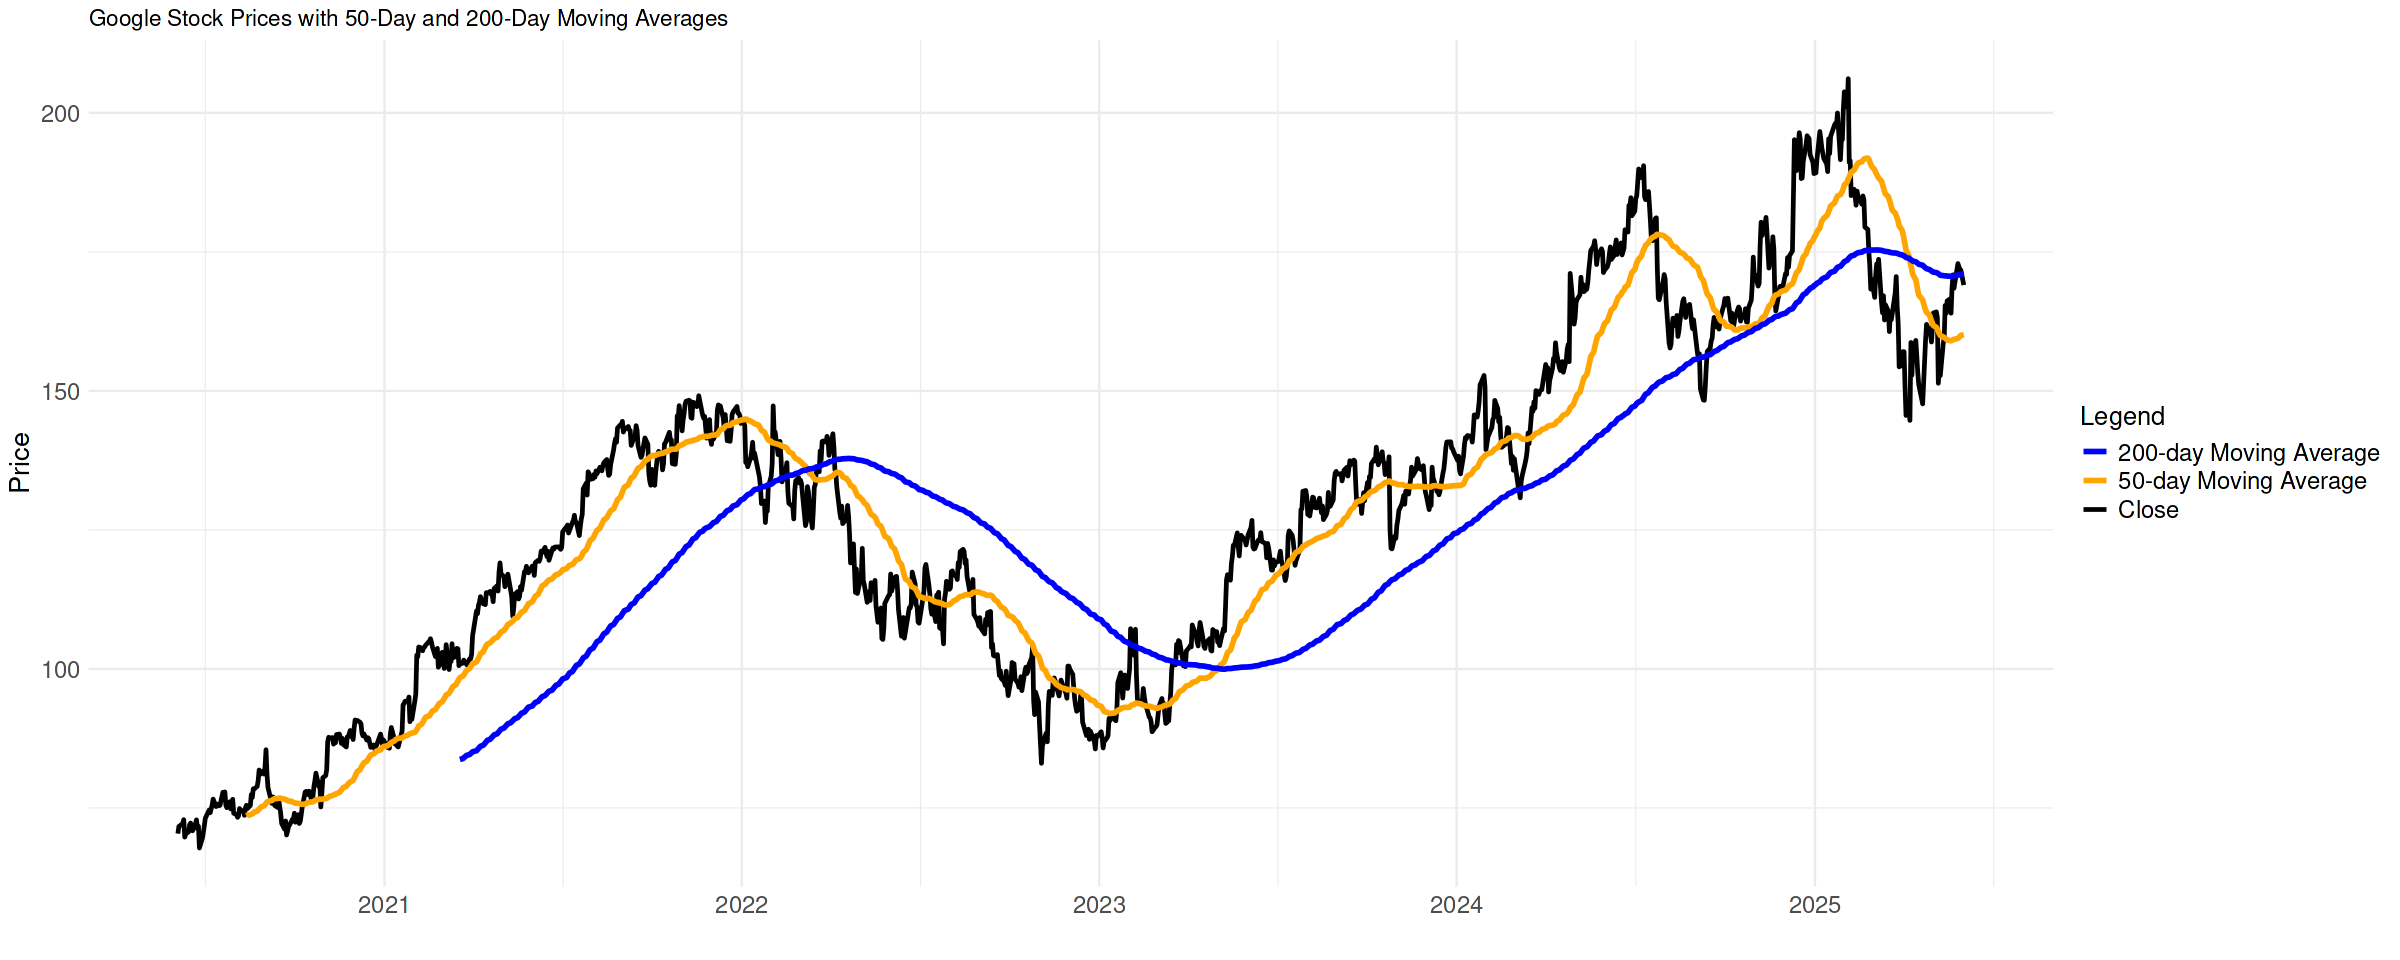

In [22]:
## Making the plot appear bigger

options(repr.plot.width = 20, repr.plot.height = 8)

## Line chart comparing closing stock price, Moving average for 50 days and 200 days 

ggplot(google_df, aes(x = Date)) +
              geom_line(aes(y = Close, color = "Close"), linewidth = 1) +
              geom_line(aes(y = MA_50, color = "50-day Moving Average"), linewidth = 1.2) +
              geom_line(aes(y = MA_200, color = "200-day Moving Average"), linewidth = 1.2) +
              scale_color_manual(
                name = "Legend",
                    values = c(
                              "Close" = "Black",                   # black for close price
                              "50-day Moving Average" = "Orange", # orange
                              "200-day Moving Average" = "Blue" # blue
                                )
                                  ) +
            labs(
                title = "Google Stock Prices with 50-Day and 200-Day Moving Averages",
                    y = "Price", x = ""
                  ) +
            theme_minimal() +
            theme(
                  axis.text = element_text(size = 14),
                  axis.title = element_text(size = 16),
                  legend.text = element_text(size = 14),
                  legend.title = element_text(size = 15)
                 )

# Insights

* Uptrend (2021 & 2024): Both moving averages rise, and the price stays above them — indicating positive market sentiment and investor confidence.

* Correction Phase (2022): The 50-day average crosses below the 200-day line — known as a "death cross" — signaling short-term weakness.

* Recovery Signs (Late 2023 to 2024): The 50-day moving average climbs back above the 200-day average — called a "golden cross" — suggesting a return of upward momentum.

* Recent Pullback (2025): The price is falling and approaching the 200-day average again — which could indicate a critical support zone.

*  This stock chart tells us that Google's stock has experienced strong growth phases with temporary corrections. The moving averages help smooth out the noise and show us that long-term trends are still intact, but recent movements suggest the stock is at a turning point — an important signal to watch closely.

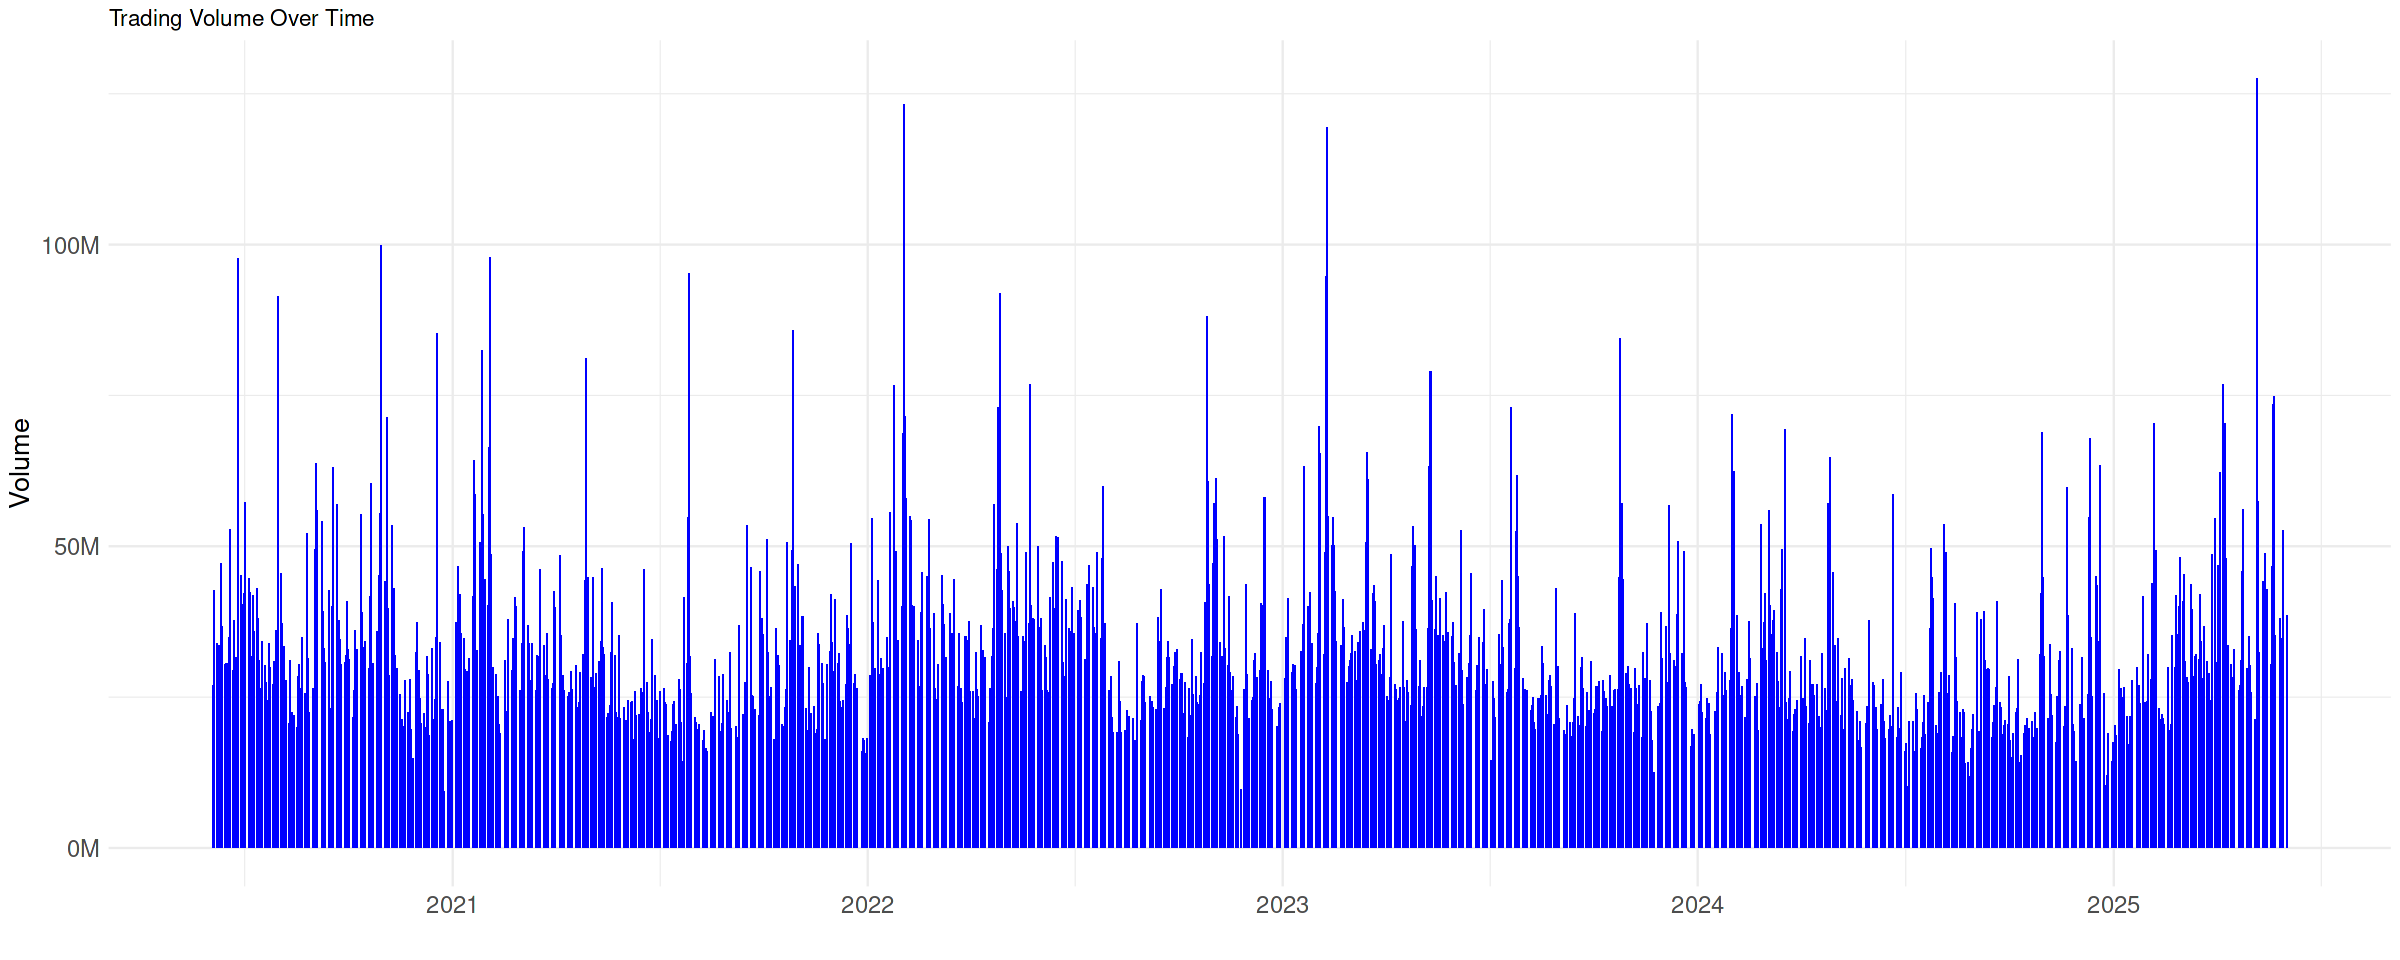

In [23]:
## Column chart to measure Volumes of share traded vs Date

options(repr.plot.width = 20, repr.plot.height = 8)
ggplot(google_df, aes(x = Date, y = Volume)) +
  geom_col(fill = "blue") +
  labs(title = "Trading Volume Over Time", x = "", y = "Volume") +
  scale_y_continuous(labels = label_number(scale = 1e-6, suffix = "M")) +
  theme_minimal() +
   theme(axis.text = element_text(size = 14),
         axis.title = element_text(size = 16),
         legend.text = element_text(size = 14),
         legend.title = element_text(size = 15)
        )

# Insights

* This chart shows the number of Google shares traded each day. High bars mean more trading activity — often during major events like earnings releases, big announcements, or market uncertainty. We can see several spikes in trading volume, especially in early 2022 and 2023, which likely align with those kinds of events.
  
* Even when prices dipped in late 2022 and 2023, trading activity stayed strong. This shows that investors were actively adjusting positions rather than staying on the sidelines — which can mean confidence in the stock’s longer-term value.

  
* Volume appears relatively stable in 2023, possibly suggesting a more steady investor base or fewer major events.



Warning message:
“Removed 21 rows containing missing values or values outside the scale range
(`geom_line()`).”


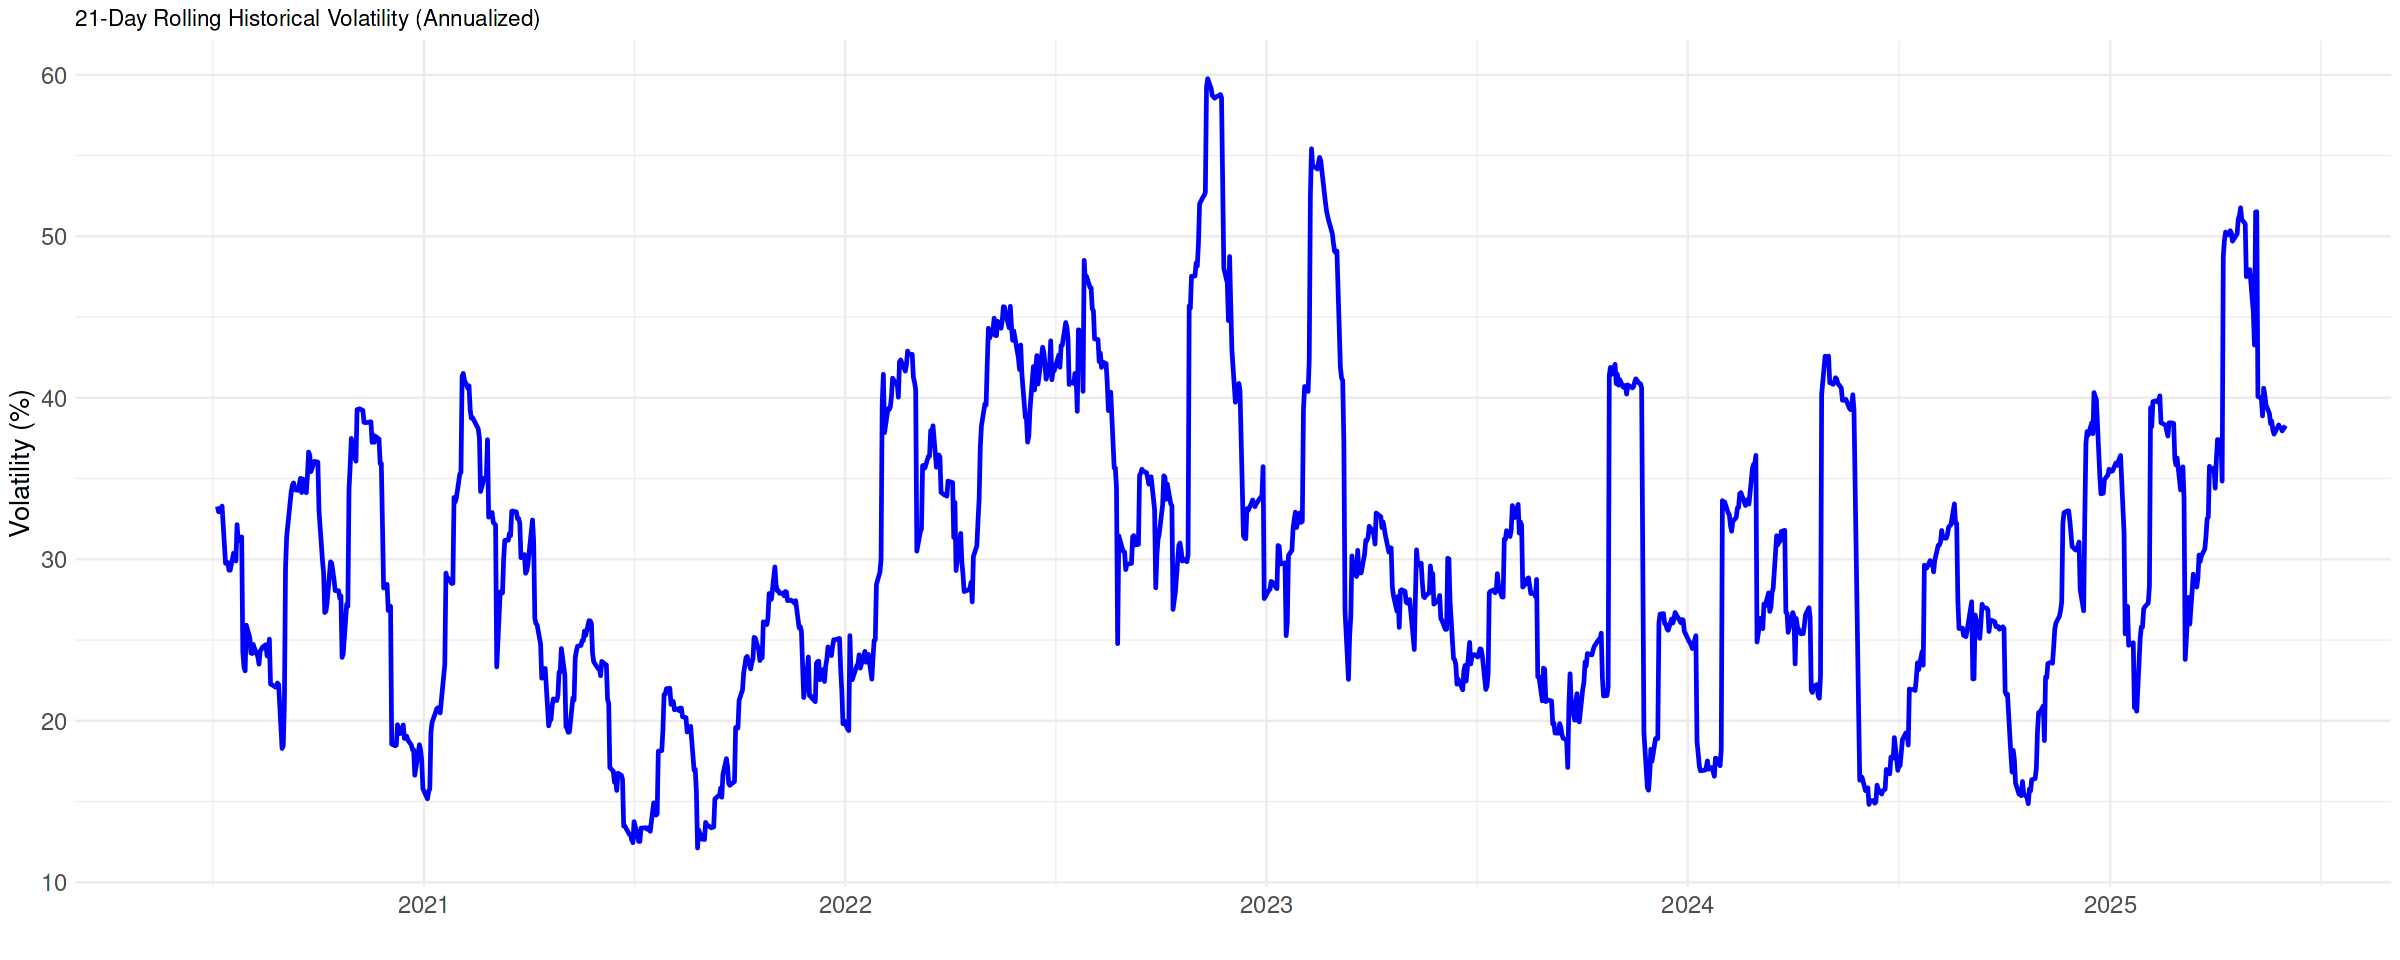

In [24]:
## 21-Day Rolling Historical Volatility vs Date

options(repr.plot.width = 20, repr.plot.height = 8)
ggplot(google_df, aes(x = Date, y = volatility_21d)) +
  geom_line(color = "blue", linewidth = 1) +
  labs(title = "21-Day Rolling Historical Volatility (Annualized)", x = "", y = "Volatility (%)") +
  theme_minimal() + 
   theme(axis.text = element_text(size = 14),
         axis.title = element_text(size = 16),
         legend.text = element_text(size = 14),
         legend.title = element_text(size = 15)
         )

# Insights

* Volatility spikes in early 2023 and again in late 2024 to early 2025 suggest market uncertainty or reactions to specific news/events.

* Quieter periods (e.g., mid-2021) show times of relative confidence or fewer disruptive market forces.

* This is not about whether the price is going up or down, but how dramatically it is changing.

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_col()`).”


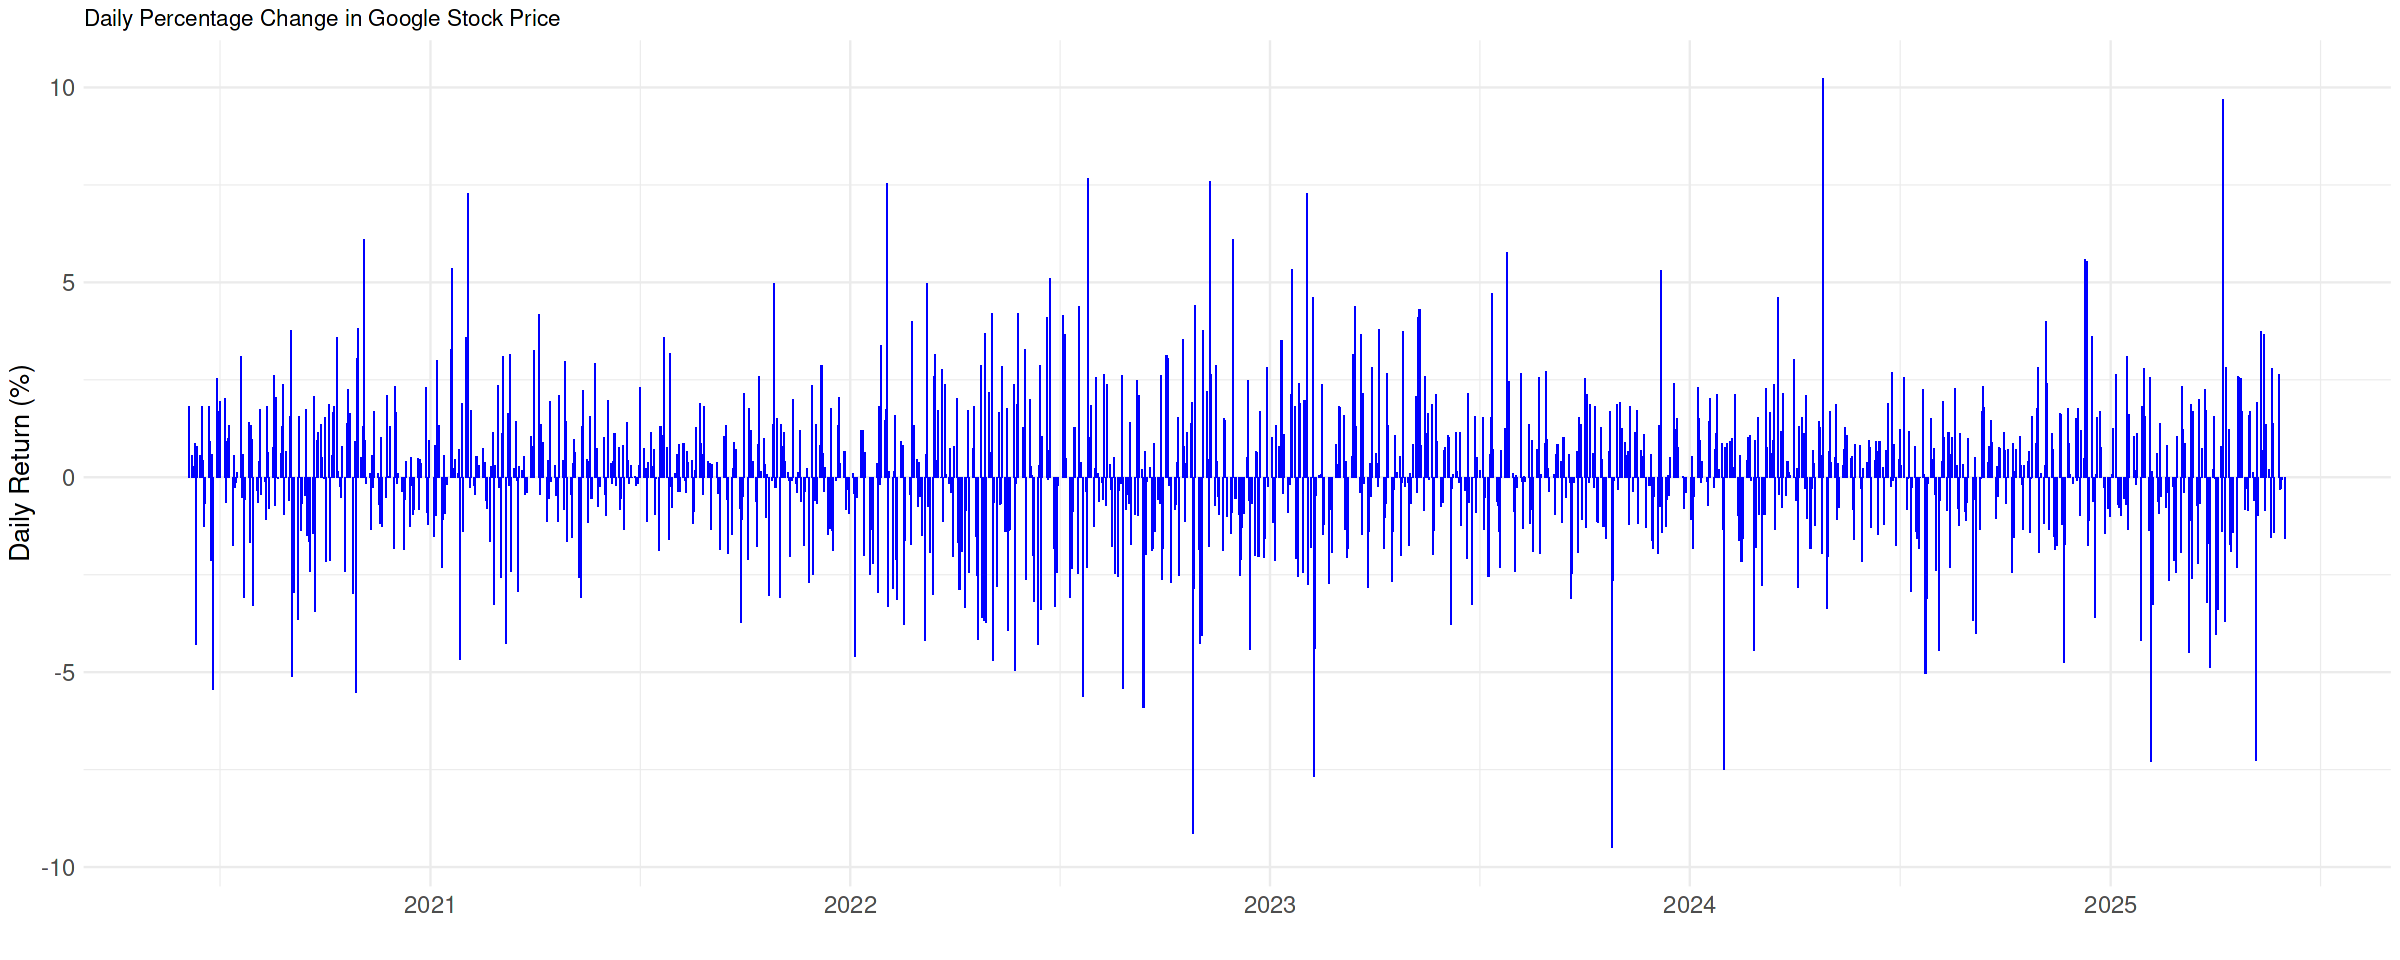

In [25]:
## Tracking daily chages in stock prices in percentages
ggplot(
  google_df,
  aes(
    x = Date,
    y = daily_return_simple * 100,
    text = paste0("Date: ", Date, "<br>Daily Change: ", round(daily_return_simple * 100, 2), "%") ## Creating text for tooltip by rounding off
  )
) +
  geom_col(fill = "blue") +
  labs(
    title = "Daily Percentage Change in Google Stock Price",
    x = "",
    y = "Daily Return (%)"
  ) +
  theme_minimal() +
   theme(
    axis.text = element_text(size = 14),
    axis.title = element_text(size = 16),
    legend.text = element_text(size = 14),
    legend.title = element_text(size = 15)
  )

# Insights

* The line graph illustrates the daily percentage change in Google's stock price — also known as daily returns.

* Spikes above 0% show days the stock went up, while dips below 0% show price drops.

* Most movements are between -2% and +2%, but some days show sharp jumps or drops, highlighting market events or earnings releases.



# Summary of Visuals

1.  **Price & Moving Averages (Chart 1)**

  * In 2022 and 2023, Google’s stock price declined sharply.

  * The 50-day moving average fell below the 200-day moving average multiple times — a technical signal often viewed as bearish.

  * This indicates sustained downward momentum and loss of investor confidence during that period.

2.  **Volume (Chart 2)**

  * Despite falling prices, trading volume remained high.

  * This suggests that investors were actively trading, not staying idle — likely:

     * Rebalancing portfolios

   
     * Selling at losses

    
     * Institutional repositioning.

  * So, while price dropped, market activity didn’t dry up — it intensified, reflecting uncertainty or strategic movement.

3. **Volatility (Chart 3)**

  * Volatility spiked significantly during those same periods.

  * High volatility + high volume + falling prices typically signals a highly reactive, uncertain market.

  * It tells shareholders that the market wasn't calm — it was noisy and dynamic, possibly due to:

     * Macroeconomic pressures

     * Earnings surprises

     * Sector-wide corrections (e.g., tech pullbacks)


4. **Daily Percantage Change**

  * While most days show small changes (within ±2%), we can spot sharp spikes during market events.
     
  * Though prices dropped in 2022–2023, this chart confirms that trading activity continued actively, suggesting investor reactions and repositioning during uncertain periods. This actually corresponds with chart 2.




# Conclusion

1. **2022–2023 Decline with High Activity**

* In the moving average chart, Google stock fell significantly in late 2022 and into 2023, dropping below both its 50- and 200-day moving averages.

* However, in the trading volume chart, we see no drop in trading activity — investors weren’t passive; many were rebalancing portfolios, selling, or repositioning.

* The volatility chart confirms this: volatility spiked, meaning there were larger price swings, often due to uncertainty or major news.

* Finally, in the daily return chart, there’s more erratic movement and extreme changes in 2022–23 — especially sharp losses followed by rebounds, showing unstable market sentiment.

2. **2025 Recovery Phase**

* In 2025, the stock price trends upward, recovering toward previous highs.

* Moving averages support this as both the 50-day and 200-day lines turn upward — a technical bullish sign.

* Interestingly, volatility also increased again in 2025, meaning investors were optimistic but cautious — possibly reacting to earnings, tech news, or global events.

* The daily return chart reflects this with short bursts of both gains and losses, showing momentum trading or investor reactions to new developments.

### Final Comments

From 2022 to 2023, we saw a major price drop in Google stock. But trading volume stayed high — showing investors were active, not idle. Volatility spiked, and daily returns showed wide swings — a classic sign of uncertainty. In 2025, things improved: prices went up, moving averages turned positive, and although volatility remained high, it reflected growing investor engagement and opportunity. Further analysis is possible using finacial data models.